# Cleaning Data

<br>in this notebook we will clean data and unify job posts in order to get better analysis results <br>
cleaning `Job Title` steps include:

- remove hash sign from hashtags.
- remove leading and trailing spaces.
- remove useless punctuation.
- unify job titles ex. `(reactjs , react-js, react js, react.js) -> react-js`.
- getting higher level job title, ex. `ios developer -> mobile developer` and `laravel developer -> back-end developer`.
- extract experience level from job title (senior, mid, junior).


In [11]:
import numpy as np
import pandas as pd
import re
from wordcloud import WordCloud


In [121]:
# reading data
data = pd.read_csv("../data/data_v5.4.csv")


In [122]:
def clean_text(text: str) -> str:
    # remove hashtag, colon, leading and trailing spaces
    # we are using a regular expression to remove hash signs
    # to avoid removing the # in C# jobs
    if text is np.nan:
        return text
    hashtag_regex = re.compile(r"\B#")
    text = text.lower()
    text = hashtag_regex.sub("", text)
    text = text.replace(":", "")
    text = text.strip()
    return text


checking data before cleaning it


In [123]:
data.job_title.nunique()


427

there's 427 unique job titles in dataset, we will try to reduce that number


In [124]:
# cleaning job title column
data.job_title = data.job_title.apply(lambda title: clean_text(title))
data.job_title.nunique()


366

In [125]:
# craft position from the job post and remove it from the title

experience = data.job_title.apply(
    lambda x: np.nan
    if x is np.nan
    else "senior"
    if "senior" in x
    else "mid"
    if "mid" in x
    else "junior"
    if "junior" in x
    else np.nan
)
data["abstract_title"] = data.job_title.apply(
    lambda x: x.replace("senior", "").replace("junior", "").replace("mid", "").strip()
    if x is not np.nan
    else np.nan
)
print(data.abstract_title.nunique())


341


removing experience level from job title decreased unique job titles by 25


In [126]:
def abstract_job_title(title):
    if title is np.nan:
        return title
    abstract_titles = {
        "full-stack": [
            "full stack",
            "fullstack",
            "full-stack",
            "(laravel + vue.js)",
            "(laravel+vue.js)",
            "flutter / laravel developer",
            "laravel and reactjs",
        ],
        "front-end": [
            "front end",
            "frontend",
            "front-end",
            "react js developer",
            "react.js developer",
            "reactjs developer",
            "vue.js developer",
            "vue developer",
            "front developer",
            "angular developers",
        ],
        "back-end": [
            "back end",
            "backend",
            "back_end",
            "back-end",
            "laravel developer",
            "laravel php developer",
        ],
        "ui/ux designer": ["ui/ux", "ux/ui", "ui ", "ui\\ux", "ui-ux"],
        ".net developer": [".net core developer", ".net developer", ".net server"],
        "mobile app developer": [
            "mobile app",
            "mobile ",
            "moobile app",
            "(mobile)",
            "flutter developer",
            "ios developer",
            "android developer",
        ],
        "motion designer": [
            "motion graphic designer",
            "video graphic designer",
            "motion graphics",
        ],
        "graphic designer": [
            "graphic designer",
            "graphic_designer",
            "graphic designers",
        ],
        "social media manager": [
            "social media",
            "youtube channels manger",
            "blog manager",
        ],
        "sales": ["sales"],
        "web developer": [
            "web developer",
            "web_developer",
            "web/app developer",
            "website developer",
            "_web_developer",
            "web designer",
            "web application developer",
            "web developers",
        ],
        "software developer": [
            "software developer",
            "software developers",
            "softwaredeveloper",
        ],
        "digital marketing": [
            "digital marketing manager",
            "digital marketer",
            "digital marketing executives",
            "manager of marketing",
            "marketing manager",
        ],
        "network and system administrator": [
            "network & system administrator",
            "network and system administrator",
            "network & systems administrator",
            "network and system auditor",
            "networks & servers specialist",
        ],
        "accountant": [
            "accounting manager",
            "accountant",
            "accountants",
            "chief accountant",
        ],
        "quality assurance": [
            "quality assurance",
            "software quality",
            "qa engineer",
            "software_qa_tester",
            "software qa tester",
            "software_manual_tester",
            "software_tester",
            "software test engineer",
            "qa tester",
        ],
        "human resources": [
            "hr officer",
            "hr specialist",
            "hr recruiter",
            "human_resources",
            "human resources",
        ],
        "content creator": ["content", "copy writer", "news editor"],
        "secretary": ["secretary"],
    }
    sub = title
    for k, v in abstract_titles.items():
        for kw in v:
            if kw in sub:
                sub = k
                # print(sub)
    return sub


In [127]:
data.abstract_title.apply(abstract_job_title).nunique()


170

In [128]:
data["abstract_title"] = data.abstract_title.apply(abstract_job_title)
data["experience"] = experience


In [129]:
data.shape


(877, 19)

In [130]:
data.head()


,id,date,photo,text,text_entities,raw_text,type,ocr_res,full_text,description,job_title,company_name,salary,location,job_type,years_of_experience,skills,abstract_title,experience
0,1567,2022-01-02 13:46:28,photos/photo_1205@02-01-2022_13-46-28.jpg,"['Job Title:', {'type': 'hashtag', 'text': '#s...","[{'type': 'plain', 'text': 'Job Title:'}, {'ty...",Job Title:#senior and a junior #developer\n \n...,job_post,We are on the hunt for a JUNIOR/SENIOR Develop...,Job Title:#senior and a junior #developer\n \n...,\nJob Title: Junior/Senior Developer\nCompany ...,junior/senior developer,NaN,NaN,NaN,full-time,extensive,"php, laravel, sql, javascript, html5, css, boo...",/ developer,senior
1,1568,2022-01-03 11:09:36,photos/photo_1206@03-01-2022_11-09-36.jpg,"['Job Title:', {'type': 'hashtag', 'text': '#c...","[{'type': 'plain', 'text': 'Job Title:'}, {'ty...",Job Title:#cashier\nJob Type: #full_time\n \nش...,job_post,Jolgi Job Type:Full Time Send your CV to m.jaw...,Job Title:#cashier\nJob Type: #full_time\n \nش...,\nJob Title: Cashier\nCompany Name: Euroline-R...,cashier,euroline-rent,NaN,damascus,full time,3,"english language, jobseekers, jobseeker, inter...",cashier,NaN
2,1569,2022-01-03 14:28:11,photos/photo_1207@03-01-2022_14-28-11.jpg,"['Company: ', {'type': 'hashtag', 'text': '#Na...","[{'type': 'plain', 'text': 'Company: '}, {'typ...",Company: #National_Technology_Group #NTG)\nJob...,job_post,JOIN OURTEAM We're Hiring. NET DEVELOPER +lyea...,Company: #National_Technology_Group #NTG)\nJob...,\nJob title: .NET Developer\nCompany Name: Nat...,.net developer,national technology group (ntg),NaN,damascus,full time onsite,1,"asp core, reactjs",.net developer,NaN
3,1570,2022-01-03 17:12:13,photos/photo_1208@03-01-2022_17-12-13.jpg,"['Job title: ', {'type': 'hashtag', 'text': '#...","[{'type': 'plain', 'text': 'Job title: '}, {'t...",Job title: #Employees for Operations Departmen...,job_post,Job Vacancy Employees for Operations Departmen...,Job title: #Employees for Operations Departmen...,\nCompany Name: None\nSalary: None\nYears of E...,operations department,NaN,NaN,on: #Damascus,#Full_Time,NaN,"perfect knowledge & use for english, basic com...",operations department,NaN
4,1571,2022-01-03 19:16:11,photos/photo_1209@03-01-2022_19-16-11.jpg,"[{'type': 'link', 'text': 'https://www.faceboo...","[{'type': 'link', 'text': 'https://www.faceboo...",https://www.facebook.com/384708578676644/posts...,link,Jmloi AWASOL Developer Remotely Send your CV t...,https://www.facebook.com/384708578676644/posts...,\nJob Title: AWASOL Developer \nCompany Name: ...,awasol developer,smartech-sy,NaN,remotely,NaN,NaN,NaN,awasol developer,NaN


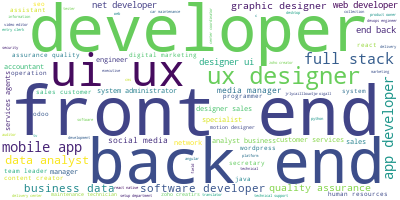

In [131]:
# creating word cloud to form a higher understanding of titles
long_string = ",".join(
    list(
        data.loc[data.abstract_title.notna()]
        .abstract_title.apply(abstract_job_title)
        .values
    )
)

wordcloud = WordCloud(
    background_color="white", max_words=5000, contour_width=3, contour_color="steelblue"
)

wordcloud.generate(long_string)

wordcloud.to_image()


as the word cloud shows, **front-end** , **back-end**, **ui-ux designer** and **full-stack** are the top words in job posts title <br>

we can see also keywords such as software developer, graphic designer, and mobile app


In [132]:
data.to_csv("../data/data_v6.csv", index=False)


### Conclusion

- job titles were cleaned
- new _experience_ column was created
- new _abstract_title_ column was created


## Cleaning Salary Column


In [3]:
data = pd.read_csv("../data/data_v6.csv")


In [4]:
data.salary.nunique()


101

In [5]:
def contains_digit(string):
    return any(char.isdigit() for char in string)


In [7]:
pattern = r"syp|sp|l\.s|syrian lira"
digits = r"\d+"
dollar = r"dollar|usd"


In [9]:
manual_input = []
salaries = data[data.salary.notna() & data.salary.str.contains(digits)][
    ["full_text", "salary", "type"]
]
for i in range(salaries.shape[0]):
    item = salaries.iloc[i]
    print(item.full_text)
    print(f"Salary: {item.salary}")
    print(f'Type: {item["type"]}')
    user_input = input()
    if user_input == "":
        user_input = item.salary
    manual_input.append(user_input)
    print("*" * 40)


https://www.facebook.com/384708578676644/posts/1272217216592438/
WE ARE HIRING Graphic designer info@vtech-soft.com Job code GR-D 800103
Salary: 800103
Type: link


 none


****************************************
🔵Company: #Scandinavia Tech.
Address: #Syria- Damascus- Kasaa Street, opposite of Al Zahrawi hospital.
Position: #Front End #ReactJs Developer
Job type: #Full Time
#Salary Range: Starting from 1.5 million
1 Year experience is needed.
Vacation: 14 days paid vacation per year
📑Job Description:
📌Translating designs and wireframes into high-quality code
📌Building reusable components and front-end libraries for future use.
📌Optimizing components for maximum performance across a vast array of web-capable devices and browsers.
📤Job Requirements:
📌Strong knowledge of #HTML5, #CSS3, #JS, #ES6 and #TypeScript.
📌Strong knowledge of ReactJS (NextJS is a big plus).
📌Good knowledge of UI libraries and system design (Material UI or TailwindCss is a plus).
📌Good knowledge of state management solutions (Redux toolkit or Zustand is a plus).
📌Good experience in Git source control.
📌Good understanding of Agile methodologies.
📌Understanding of SEO principles.
Famili

****************************************
🕹Job Title: #Flutter Developer
Job Type: #Full Time
Job Location: #Remotely or in #Damascus, Al-Jeser Al-Abead

We are hiring ( flutter developer )

📌 at least 3 years XP on android or ios
📌 at least 2 years XP on flutter
📌 full time only
📌 advanced level in English
📌Salary will be determined after the interview up to: 2000,000 SYP
مكان العمل: في الشركة دمشق الجسر الأبيض أو عن بعد
📮Send CV to: 
Career.solutions.fast@gmail.com

#تواصل #فرص #عمل #توظيف #شاغر
#Tawasol #Tawasol_Job
#Hiring  #job #developer
#Tawasol #Tawasol_Job
#jobseekers #jobseeker #interview #covid #recruiter #jobsearching #engineer #hiringnow
Jploi TAWASOL job vacancy Flutter Developer 11:22 Tuesday,Sep17 Full Time Remotely/ at the company office in Damascus Salary Up to:2000,000SYP Send yourCV to: Career.solutions.fast@gmail.com 0992081792 Jnlgi Jialgi
Salary: up to: 2000,000 syp
Type: job_post


****************************************
🎖Job Title: #IOS Developer
Job Type: #Full_Time
#remotly or in office

We are hiring professional ios developer 

- at least 5 years XP in Swift/Objective-C
- strong OOP knowledge
- SOLID & Clean Principles
- full time only
- advanced level in English
- remotly or in office
 - salary according to experience up to 2,500,000 

📮Career.solutions.fast@gmail.com

#Tawasol #Tawasol_Job
#jobseekers #jobseeker #interview #covid #education #recruiter #jobsearching #engineer #hiringnow #employmentopportunities  #vacancy
Jnloi AWASOT job vacancy IOS Developer 1122 Tuesday Sep 17 Remotely/or in office Salary Up to: 2,500,000SYP Send yourCVto Career.solutions.fast@gmail.com 0992081792 Jnlgi oigi
Salary: up to 2,500,000syp
Type: job_post


****************************************
https://www.facebook.com/384708578676644/posts/1294265341054292/
Jploi We're hiring Backend/Frontend Developers C++ CSS HTML FRONT BACK Starting Salary: END END 1,500,000 SYP JAVA PHP Full Time/ Remote Send Your CV to: It.department@nestech.org Jmlgi 0992081792 Jalgi
Salary: 1,500,000 syp
Type: link


****************************************
🔴Company: #Ridgetech
Job Title: #Backend #Laravel #Developer
Job Type: Office #Full_time / 10am-5pm / Sunday- Thursday
Job location: #Halboni, #Damascus 
Ridgetech a Syrian Software Company is looking for a motivated Backend Laravel developer to join our team TODAY!

🗂Requirements:
👉Has great working experience in developing websites at least 3-4 projects application and 1-2 years of experience.
👉Great Knowledge in REST API.
👉Great Knowledge in mySQL data base
👉Has Knowledge in Flutter and React js or Vue js (+plus).
👉Able to integrate and work within collaborative and distinctive team.
👉Ensure HTML, CSS, jquery, and blade
👉Experience with Git
👉Basic knowledge in docker
👉Creative and efficient problem solver
👉Team work

⛳️Salary: Starting 600,000 syp + depending on experience

📮If you find yourself qualified for position, don't hesitate
to contact with us and send your CV to Whatsapp 0940204205 

 #Tawasol #Tawasol_Job
#Software #Multimedia  #Jo

****************************************
🔵Company: #qtechit
Job title: #Backend Developer

Backend
📑Requirements:
👉 Over two year's developing PHP Laravel.
👉Write “clean”, well-designed code.
👉Strong knowledge of OOP / Solid principles.
👉High level of database management.
👉 Good knowledge of bootstrap and Jquery
Experienced in database design and mysql.
👉Strong knowledge in Restful API 

📮Send resumes to: 
careers@qtechit.com

#Tawasol #Tawasol_Job
#Software #Multimedia #Marketing #JobOpening
#Damascus #Syria 
#jobseekers #jobseeker #interview #covid #education #recruiter #jobsearching #engineer #hiringnow #employmentopportunities  #vacancy
0101000111000 Tech 1900001 8 .0 GROUP 0100 .0 NOW HIRING 91 8 0 .0 01100100 0 BackendDeveloper Attachedisanoverviewofpastwork Please send yourcVto theemail:careers@gtechit.com
Salary: 1900001
Type: job_post


 none


****************************************
🕹Job Title: #Graphic designer
Job Type: #Full_Time
Job Location: #Damascus

مكتب طباعة يطلب مصمم خبرة بتصميم المطبوعات .. 

⛳️دمشق .. شارع العابد .. 

⛳️رنج الراتب 500 --> 700 ..

⛳️دوام كامل .
📮ايميل التواصل:
 design@ways-bs.com

#Tawasol #Tawasol_Job
#Software #Marketing #JobOpening #Syria 
#jobseekers #jobseeker #interview #covid #education #recruiter #jobsearching #engineer #hiringnow   #vacancy
We are Jnloi HIRING... Graphic Designer Damascus Send your CV to: design@ways-bs.com 0992081792 Uaigj
Salary: 500-700
Type: job_post


****************************************
🔴Company: #zero1soft
Job Title: #IT Support 
Location: #Remotely
Job Type: #Full_Time

مطلوب موظف/ة دعم فني / IT للعمل من المنزل. 
خبرة بالبرامج وتنزيلها ولبق/ة بالتحدث مع العملاء 
📝المتطلبات الفنية :
📌العمل من المنزل بدون ضوضاء 
انترنت 4 ميغا فما فوق. 
📌كهرباء متوفرة من الساعة 9-5 (بطارية او طاقة )
📌الراتب 350000 ل.س اول 4 شهور
📮التواصل على الايميل:
info@zero1soft.com

#Tawasol #Tawasol_job
#Software #Marketing
#Design #Application #Website
#Programming #JobOpening
#Damascus #Syria
We Are IT Support Hiring TECHNICAL SUPPORT Full Time Remotely S Send your CV to: info@zero1soft.com ZERO ONE 0992081792 Ualgi
Salary: 350000
Type: job_post


****************************************
💎Company: #SawafTECH
Job Title: #Full stack Developer (#Laravel + #Vue.JS)
Job Type: #Full_Time
Job Location: #Remotely work for a company located in #Istanbul, Turkey.
📑 Requirements:
📍- 2+ years of experience in PHP, Laravel framework.
📍- 2+ years of experience in VueJs.
📍- Degree in Computer Science or related fields
📍- Strong knowledge of OOP and Design Patterns.
👉 Benefits:
🔸Working remotely allows for better work-life balance.
🔸2 days off per week.
🔸Salary range 700,000 to 1,500,000 SP
🗂 Application:
- CV in PDF Format.
- Candidate GitHub profile if available.
- Candidate reference projects.
📫Apply through this e-mail:
hr@sawaftech.com

#Tawasol #Tawasol_Job
#Software #Multimedia #Marketing #JobOpening
#Damascus #Syria 
#jobseekers #jobseeker #interview #covid #education #recruiter #jobsearching #engineer #hiringnow #employmentopportunities  #vacancy
TAWAF JOINOUR TEAM EKIBIMIZEKATILIN Please sendyour C.Vto: hr@sawaftech.com Senior(Laravel

****************************************
https://www.facebook.com/384708578676644/posts/1318859651928194/
one Full Time Backe-End Tech Lead Salary range is 3,5-7MillionSYP Apply Online Js 0992081792 Jaigi
Salary: 3.5-7 million syp
Type: link


****************************************
💎Job Title: #odoo DEVELOPER
Job type: #Remotly
Location: #Damascus 

📝WE'RE HIRING 
 
1 to 2  year experience in odoo development 

⛳️Salary: 
Starts from 2,000,000 SYP


📮Drop your resume at 
odooxhub@gmail.com
 
#Tawasol #Tawasol_Job
#Hiring
#jobseekers #jobseeker #interview #covid  #education #recruiter #jobsearching  #hiringnow #employmentopportunities  #vacancy
WE'RE HIRING REMOTELY OOOODEVELOPER 1to 2-year experience in Odoo development Location:Damascus,Syria SalaryStarts from 2M JOIN OUR TEAM Drop yourresume at odooxhub@gmail.com
Salary: 2,000,000 syp
Type: job_post


****************************************
Drop your resume at 
odooxhub@gmail.com
WE'RE HIRING REMOTELY OOOO DEVELOPER 1to 2-year experience in Odoo development Location:Damascus,Syria SalaryStarts from 2M S.P JOIN OUR TEAM Drop your resume at odooxhub@gmail.com
Salary: 2m s.p
Type: others


****************************************
https://www.facebook.com/384708578676644/posts/1334105593736933/
Job Vacancy SeniorDevOps Engineer Dubai Office DEV 8 OPS 000 Send CV and 0900 portfolio to: ashraf@teamhome.ae Jnlgi 0992081792 Jalgi
Salary: dev 8 ops 000
Type: link


 none


****************************************
⛳️We are looking for a Wordpress Developer.

Company: #Mapcp
Job Title: #Wordpress Developer.
Job Type: #Full Time.
Job Location: #Remotly.
👉Salary: 600,000 ~ 1,000,000 SYP.
📮Send your CV to: careers@mapcp.in
Note: include the job title in the subject of the email.

😁Requirements:

✔️2+ years working in web development with Wordpress.
✔️Knowledge of multiple front-end languages (JavaScript, HTML, CSS) and their libraries.
✔️Ability to handle and manage projects.
✔️Experience in building both front-end and back-end of the website
✔️Developing and converting designs into themes
✔️Knowledge of WordPress Plugins
✔️Good understanding of Web architecture
✔️Good understanding of SEO.

✔️Ability to understand business requirements and translate them into technical requirements.
✔️A team player with excellent communication skills.
✔️Preferred degree in Computer Science, Information Technology or similar.
  

#Tawasol #Tawasol_job
#Software #Marketing
#De

****************************************
💎 Company: #Redeemly
Job Title: #Frontend Engineer

👉 Salary starts from: 2M SYP

📮Drop your CV to integration@redeemly.com

#تواصل #فرص #عمل
 #job #Tawasol #Tawasol_Job #Engineer
#jobseekers #jobseeker #front-end #developer #interview #covid #education #recruiter #jobsearching #engineer #hiringnow  #VacancyNews
redeerJly WE ARE HIRING!! FrontEnd Engineer 2M Salary starts from S.P HTML JS CSS Drop your CV to integration@redeemly.com
Salary: 2m syp
Type: job_post


****************************************
يعلن #معهد_التميز_التعليمي
عن جلسات #امتحانية لطلاب #التاسع الأساسي
☎️ 011- 6563361
0935376961
SAghall jyill sgenByla! wy Jiaill ngA 2022aiiolLll Cuogill awjll 6.sla.ll 9-7ggl 4000 5/27a1 1.30-11.30 alcliol 4000 5/28l 6-3=plc 4000 5/30 4000 aolepgle 6-3g 5/31 6-3 8000 6/3 09.lo 100 8000 2-11 6/4 Cll 8000 SLg 6-2 6/61 7000 6-2 6/8LV1 eaellst 8000 H9.f ule 6-2 6/12 aellaoll 8000 6-4 6/14 6563361-0935376961
Salary: 4000, 8000
Type: others


 none


****************************************
يعلن #معهد_التميز_التعليمي
عن جلسات #امتحانية لطلاب #الثالث الثانوي #العلمي و #الأدبي
☎️ 011- 6563361
0935376961
Pruyll Uujal astall 15000 63 5/29 10000 Aglall c 52 5/29 anulo 12000 1.00 6/1Ln1 UolcSuno 6l1230t 12500 6/4 aliol) 6ala12J 12500 6/5 10000 63 6/4 agolyna 63 12000 6/7 63 6/11ll 8000 $ale 63 6/15all 8000 63 6/13 8000 agilbg 6/15 63 8000 AaelJosl jioill=ao 00 62 12000 6/18 Soglaall SHS! 62 12000 /20 SHlor JOs :Cilaglrallgasja 6563361-0935376961
Salary: 15000, 10000, 12000, 12500, 10000, 8000, 8000, 8000, 12000, 12000
Type: others


 none


****************************************
🟣 Company: #Newsifier
Job Title: #Digital marketer
Job Type: #Remotely

📊Skills: 

🖍- Speak and write English fluently ( Advanced Level is required )
🖍- Have experience with digital marketing
🖍- Fast learner 

✅Benefits
🎖🎖- Very Competitive salary between 2,000,000 SYP and 3,500,000 SYP
✔️- The opportunity to work in a fast-growing company where you will learn a lot about growing an online business and online marketing
✔️- Work aside the CEO who has 15 years of experience in online marketing and growing companies


👉Full description and how to apply

https://newsifier.homerun.co/digital-marketing/en?token=4746083f302a3d09cb5bf4d32030fad9

#تواصل #فرص #عمل
#job #Tawasol #Tawasol_Job #Engineer
#jobseekers #jobseeker #interview #covid #education #recruiter #jobsearching #engineer #hiringnow  #VacancyNews
Jn!gi TAWASOI Digital Marketer Salary between: 2,000,000 and 3,500,000 (SYP) Applying online Remotely Job 0992 081 792 Jolgs
Salary: 2,000,000 - 3

****************************************
🔴 Company: #softwarus
Job Title: #FrontEnd Engineer

⛳️3+ Years Experience 
⛳️The minimum Salary is 2 Millions SP 

📮Send CV to:
 hr@softwarus.com 

#تواصل #فرص #عمل
#job #Tawasol #Tawasol_Job #Engineer
#jobseekers #jobseeker #interview #covid #education #recruiter #jobsearching #engineer #hiringnow  #VacancyNews
SWus WE ARE HIRING FrontEnd lEngineer CSS BUILD HTML IS 3+ Years Experience The minimum Salary is 2 Millions SP Send CV to hr@softwarus.com
Salary: 2 millions sp
Type: job_post


****************************************
🔴 Company: #softwarus
Job Title: #Team Leader 

 WE ARE HIRING 

🎖3+ Years Experience 
🎖The minimum Salary is 2 Millions SP 
📮Send CV to hr@softwarus.com 

#تواصل #فرص #عمل
#job #Tawasol #Tawasol_Job #Engineer
#jobseekers #jobseeker #interview #covid #education #recruiter #jobsearching #engineer #hiringnow  #VacancyNews
SWus WE ARE HIRING Team Leader JHT 3+ Years Experience The minimum Salary is 2 Millions SP Send CV to hr@softwarus.com
Salary: 2 millions sp
Type: job_post


****************************************
🔴 Company: #softwarus
Job Title: #Full Stack web developer

 WE ARE HIRING 

🎖3+ Years Experience 
🎖The minimum Salary is 2 Millions SP 
📮Send CV to hr@softwarus.com 

#تواصل #فرص #عمل
#job #Tawasol #Tawasol_Job #Engineer
#jobseekers #jobseeker #interview #covid #education #recruiter #jobsearching #engineer #hiringnow  #VacancyNews
SWus WE ARE HIRING Full Stack Web Developer CSS 0. Js PHP 10 3+ Years Experience The minimum Salary is 2 Millions SP Send CV to hr@softwarus.com
Salary: 2 millions sp
Type: job_post


****************************************
🔴 Company: #Limusoft
Job Title: #Frontend Engineer
Job Type: #full time 
Job location: #Remotely

We're a newly established solution provider startup company, looking to build a strong team, guide them to take their career to next level by working remotely on various projects.
👉Job description:
As a Frontend Engineer, you will be responsible for building new user interfaces as well as enhance and maintain the already existing ones. You'll have to interact with engineers, designers and clients to assure the best collaboration. 
✅Requirements:
🔹- Experience with Javascript
🔹- Experience with ReactJs
🔹- Good English communication and technical writing 
🔹- Git
🔹- Full time (Flexible)
🔹- Salary range: 800 000 SP to 1 500 000 SP
🔹- Progressive Salary
🔹- Long term

📮To apply please send resume to careers@limusoft.com

#تواصل #فرص #عمل
#job #Tawasol #Tawasol_Job #Engineer
#jobseekers #jobseeker #interview #covid #education #recruiter #jobsearching #engi

****************************************
💎Company: #Deal App
Job title: #Graphic_Designer 
Job Type: #Part_Time
Job location: #Damascus
شركة Deal App.
المقر: دمشق.
مطلوب Graphic Designer للعمل بشكل جزئي part time لشركة تطبيق موبايل.
(تُحدَّد ساعات العمل بالاتفاق أثناء المقابلة بما يناسب الطرفين)
📝المهام الوظيفية:
🔹- تصميم الحملات الدعائية والهوية البصرية للشركة.
تصميم صور وفيديوهات و stories لمنشورات السوشال ميديا تجذب انتباه المستخدم لزيادة تفاعلهم لحملات التسويق عبر شبكات التواصل الاجتماعي.
🔹_ معرفة بالتصاميم الخاصة بالطباعة وتصاميم السوشال ميديا
🔹_ السرعة والدقة في أداء العمل 
🔹_الدوام جزئي Part Time.
🔹اللغة: العربية، English.
🔹الراتب: 400000 s.p
🔹العنوان : مزة ڤيلات غربية
⛳️البرامج المطلوبة: 
Adobe Photoshop, Illustrator, Indesign, Adobe illustrator.
Sound knowledge of Motion Graphic and Animation.
📮للتواصل إرسال السيرة الذاتية مع نماذج الأعمال السابقة على الرقم التالي : 0994598209


#Design 
#Software #Multimedia #Marketing
#Programming #Job_opening 
#Work #Vacancy  
#Damascus #Sy

****************************************
Company: #flexsolution
Job Title: #Social Media Specialist 

تبحث شركة الحلول المرنة عن موظف سوشل ميديا للانضمام الى فريقها
يمتلك المواصفات والمؤهلات التالية:

- معرفة جيدة بمواقع التواصل الاجتماعي.
- ‏خبرة سنة في إدارة صفحات سوشل ميديا.
-مستوى جيد باللغة الانكليزية.
-مهارات بالتواصل
-مستوى جيد ببرامج word وexcel
-القدرة على الابتكار وايجاد الحلول المناسبة.
-القدرة على العمل ضمن فريق.
-مهارة جيدة في تنظيم وإدارة الوقت.

اذا كنت تملك المواصفات التالية ومهتماً بالانضمام الى فريقنا
📮يرجى ارسال السيرة الذاتية على البريد الالكتروني:
hr@flexsolution.biz
الموضوع :"SM"

#Tawasol #Tawasol_job
#Software #Marketing
#Design #Application #Website
#Programming #JobOpening
#Damascus #Syria
FLEX SOLUTIONS Social Media Specialist WE ARE HIRING 1K send your CV to hr@flexsolution.biz
Salary: 1k
Type: job_post


 none


****************************************
💎 Company: #Deal App
Job Title: SALES 
Job Type: #Full_Time
شركة Deal App 
تبحث عن مسؤول مبيعات لخدمات تطبيق موبايل 
التوصيف الوظيفي:
هو المسؤول عن التواصل مع العملاء بالإضافة لجمع معلوماتهم.
المهام الوظيفية لمسؤول المبيعات :
🔸•جمع المعلومات المطلوبة عن العملاء الخاصة بالتطبيق .
🔸• بالإضافة للتواصل مع العملاء من خلال الاتصال او زيارتهم.
🔸•متابعة الأهداف الشهرية للمبيعات والعمل على تحقيقها.
🔸•تقديم تقارير دورية عن العمل.
📑المهارات اللازمة لوظيفة مسؤول المبيعات :
📍•امتلاك مهارات في الإقناع والتفاوض.
📍•القدرة على إدارة الوقت .
📍•حسن المظهر والثقة بالنفس واللباقة في الحديث. 
📝متطلبات العمل في وظيفة مندوب التسويق:
📌•شهادة جامعية أو شهادة ثانوية كحد أدنى.
📌•الخبرة السابقة في مجال التسويق للتطبيقات. 
⛳مكان: مزة غربية
⛳وقت الدوام: الاحد للخميس من ٩ ص حتى ٥م
⛳المعاش: ابتداء من 350000  ل.س 
📮يرجى  إرسال الCV على الرقم الآنسة مارلا 0965065209


 #JobAlert #hiring   #React #vacancy #jobopportunity #developer #office #fulltime
#تواصل #فرص #عمل
#job #Tawasol 

****************************************
Job Title: #backend developer 
Job Type: #Full_Time
Job location: #Damascus/ remotly 

- Bachelor’s degree in computer science, information technology, or a similar field.
- 2+ years Experience      web-devlopment
- Proficiency with c/c#/java
- Eager to learn python
- Good problem-solving skills.
- Attention to detail.
- salary range : 2 / 3 million 

Working days: from Sunday to Thursday 
📮Interested candidates please send your c.v to  
Career.solutions.fast@gmail.com.

#Tawasol #Tawasol_Job
#Software #Multimedia #Marketing #JobOpening
#Damascus #Syria 
#jobseekers #jobseeker #interview #covid #education #recruiter #jobsearching #engineer #hiringnow #employmentopportunities  #vacancy
Job Vacancy Backend Developer Salary range 2/3 Million FullTime/Remotely Send CV to: Career.solutions.fast@gmail.com 0992081792 Jnlgi Jalgi
Salary: 2/3 million
Type: job_post


****************************************
Company: #SAWA ISP
Worktime: Sunday-Thursday (8:30AM - 4:30PM) 
working style: Office #full time
Location: #Damascus, Free Zone

We are hiring *programmer* to join our team with Responsibilities:

👉-3+ years work experience with PHP and the Laravel framework
👉-Experience with writing and scaling REST APIs returning JSON
👉-Strong understanding of API authentication mechanisms and scoping.
👉-Deep understanding of Object Oriented Programming
👉-Strong knowledge of MySQL, Postgres - writing and reviewing complex queries and performance tuning
👉-Experience with front end(HTML, Css, Javascript, Jquery, Bootstrap), Blade 

📮To join our team, please send your resume at hr@sawa-isp.sy

#تواصل #فرص #عمل
#job #Tawasol #Tawasol_Job
#jobseekers #jobseeker #interview #covid #education #recruiter #jobsearching #engineer #hiringnow  #VacancyNews
SAWA <title/>HelloSyrians</title <body/> {We Are Hiring Programmer} Iposition:permanent sytlebold type:awesome} </body

 none


****************************************
💎Company: #Newsifier
Job title: #Senior #Full stack developer
Job Type: #Remotely

👉Minimum experience: 3 years.

🗂Skills:
📌- You have at least 3 years of proven experience in full stack development and preferably +5 years.
📌- You’re comfortable working with both front- and back-end technologies. ( with more focus on the backend )
📌- You have deep knowledge of PHP ( Laravel ) and JS ( Node js )
📌- You know how to do front-end changes( HTML, CSS, and JavaScript).
📌- You’re experienced with relational database design (MySQL).
Benefits
🎖Competitive salary. [ 2,450,000 SYP - 6,300,000 SYP ] depending on the experience
Unique opportunity to work on a SaaS system that is serving plus 50 million users monthly, and the ability to make an impact on our products.
Paid vacations.
📮Full description and how to apply
https://jobs.newsifier.com/full-stack-developer/en?token=b40c972a74a9a5a4d7022f08bf403d97

#Tawasol #Tawasol_Job
#Software #Multimedia #Marketin

****************************************
💎Job Title: #React.js Developer
Job Type: #Full_Time
Job location: #Damascus

We are hiring a #React.js Developer
Working full-time from office,5 days per week; 2 days off (Friday, Saturday).
Our office in Damascus Almalky
📑Responsibilities:
🔸Meeting with the development team to discuss user interface ideas and applications.
🔸Reviewing application requirements and interface designs.
🔸Identifying web-based user interactions.
🔸Developing and implementing highly responsive user interface components using react concepts.
🔸Writing application interface codes using JavaScript following react.js workflows.
🔸Troubleshooting interface software and debugging application codes.
🔸Developing and implementing front-end architecture to support user interface concepts.
🔸Monitoring and improving front-end performance.
🔸Documenting application changes and developing updates.
🗂Requirements:
✔️Bachelor’s degree in computer science, information technology, or a simi

****************************************
💎Job Title: #Software Quality Control Engineer
Job Type: #Full_Time
Job location: #Damascus, Adnan Almalky square.

We are hiring a  Software Quality Control Engineer
Company: Work with Nerds.

We are looking for a Software #Tester to be responsible for designing and running tests on software products. The software tester will conduct tests, analyze the results, and report observations to the team. Also, interact with clients in order to understand the requirements of the product. Should have good communications skills, and up to date knowledge of software programming and software test design
Software Tester Responsibilities :
 . Reviewing software requirements and preparing test scenarios or test cases.
 . Executing tests on software usability. Analyzing test results, errors or bugs, and usability.
 . Preparing daily test reports, and interacting with clients to understand product requirements. 
 . Report all defects or bugs based on user stori

****************************************
فرصتك اليوم لتحويل الحلم إلى حقيقة

فكرة ريادية + تنفيذ وجهد كبير + فرصة مناسبة = شركة ناجحة

فإذا كان عندك الفكرة الريادية والهمة العالية لتنفيذ الفكرة فالفرصة متاحة إلك اليوم للمشاركة بالمسابقة الوطنية لكأس ريادة الأعمال.

المسابقة رح تقدملك كل الموارد اللازمة للنجاح من جلسات استشارة وإرشاد وتشبيك مع مستثمرين ورح يكون عندك فرصة التأهل للمسابقة العالمية والتنافس للحصول على جوائز نقدية بقيمة مليون دولار.

#EWC_2022
المنظم المحلي صندوق الأمم المتحدة الإنمائي

https://fb.watch/eTxFRDeJB1/

Salary: 1 million dollars
Type: others


 none


****************************************
💎 Job Title: #Developers
Job location: #Damascus

شركة في دمشق  بحاجة الى مبرمجين بالمواصفات التالية                                                                                          •                            Proficient in C# and/or VB.NET, React.js, HTML5-CSS, JavaScript and jQuery.
• Experience in .NET (Framework and Core).
• Strong knowledge of the ASP.NET framework.
• Familiarity with different design/architectural patterns (REST, RPC and MVC).
• Ability to write complex and optimized SQL queries for both MSSQL Server and ORACLE Database engines.
• Understanding of Agile project management methodologies.
• Excellent troubleshooting and communication skills.
• Minimum of 3 years of experience is required.

  
📮يرجى ارسال السيرة الذاتية إلى الايميل التالي
Hrtech638@gmail.com                                                                          
علما ان الرواتب تبدأ من ٣ مليون ليرة

#تواصل #فرص #عمل #توظيف #شاغر  #JobOpening 
#Tawa

****************************************
💎Job Title: #Software Quality Control Engineer
Job Type: #Full_Time
Job location: #Damascus, Adnan Almalky square.

We are hiring a  Software Quality Control Engineer
Company: Work with Nerds.

We are looking for a Software #Tester to be responsible for designing and running tests on software products. The software tester will conduct tests, analyze the results, and report observations to the team. Also, interact with clients in order to understand the requirements of the product. Should have good communications skills, and up to date knowledge of software programming and software test design
Software Tester Responsibilities :
 . Reviewing software requirements and preparing test scenarios or test cases.
 . Executing tests on software usability. Analyzing test results, errors or bugs, and usability.
 . Preparing daily test reports, and interacting with clients to understand product requirements. 
 . Report all defects or bugs based on user stori

****************************************
💎 Company: #Xten
Job Title: #Senior Flutter Developer
Job Type: #Full_time
#remote_work

We are looking for a senior Flutter developer:
📝Job Requirements
✔️• 3+ years of experience Flutter/Dart mobile app development
✔️• experience in designing, building, refactoring and releasing native apps on Android or iOS.
✔️• Experience in Agile/Scrum methodologies and working in Agile teams is desirable
✔️• Able to own a feature of an Android or iOS application and develop it fully.
⛳️ -Salary: up to 2500.000

📮If you feel excited about our upcoming challenges, we encourage you to apply now! 
Please share send your CV to: hr@xten.app



#Hiring #flutter #flutterdev #remote #remotely #job #developer 
#Tawasol #Tawasol_Job
#health  #Marketing #JobOpening #Syria 
#jobseekers #interview #education #recruiter #jobsearching #engineer #hiringnow
We're Hiring! Senior flutter Developer
Salary: up to 2500.000
Type: job_post


****************************************
🪀 Company: #Qtech
Job Title: #Websites Developer
Job Type: #Full/Part Time, #Remotely


#شركة برمجية  Qtech#
تطلب موظف/ة للعمل كمطور مواقع
نوع العمل: #عن_بعد #دوام_كامل #دوام_جزئي
العنوان : دمشق - مزة جبل - ساحة الهدى
على أن يكون لديه خبرة لاتقول عن 2 سنوات في مايلي:
‏- Web Developer Responsive Design 
‏– PHP 
‏- Laravel Framework 
‏–JavaScript 
‏– CSS3
يرجى ارسال السيرة الذاتية على الايميل :
Careers@qtechit.com
للاستفسار الاتصال على الرقم : 0989200360

#Tawasol #Tawasol_Job
#social  #Marketing #JobOpening #Syria 
#jobseekers #interview #education #recruiter #jobsearching #engineer #hiringnow
Tech 8 .0 ROUP 100 .0 NOW HIRING 0 .0 01100100 0 BackendDeveloper Attached is an overview of past work Please send yourCvto the email:careers@gtechit.com
Salary: 100.0
Type: job_post


 none


****************************************
💎Company: #Newsifier
Job title: #Senior #Full stack developer
Job Type: #Remotely

👉Minimum experience: 3 years.

⛳️Skills:
- You have at least 3 years of proven experience in full stack development and preferably +5 years.
- You’re comfortable working with both front- and back-end technologies. ( with more focus on the backend )
- You have deep knowledge of PHP ( Laravel ) and JS ( Node js )
- You know how to do front-end changes( HTML, CSS, and JavaScript).
- You’re experienced with relational database design (MySQL).
Benefits
Competitive salary. [ 2,450,000 SYP - 7,200,000 SYP ] depending on the experience
Unique opportunity to work on a SaaS system that is serving plus 50 million users monthly, and the ability to make an impact on our products.
Paid vacations.
📮Full description and how to apply

https://jobs.newsifier.com/full-stack-developer-2 

#Tawasol #Tawasol_Job
#Software #Multimedia #Marketing #JobOpening
#Damascus #Syria
Remotely Jnl

****************************************
🔴Designation: #Senior #Graphic Designer
Vacancy Type: #Full time
Job Location: #Damascus, Syria
Salary: 1,500,000 to 3,000,000 per month
A new tech startup is looking for a Senior Graphic Designer to create fresh and compelling digital and print designs. This position requires a creative thinker who loves to execute their creative vision with perfectionism.
✅WHAT YOU DO
📍 Produce creative designs for various projects including websites, social media posts, collaterals, advertisement materials, and videos.
📍Manage graphic designs from conception to delivery.
📍Ensure design is compliant with the brand’s identity and ensure brand consistency throughout various projects.
📍Keep up with the latest national and global trends.
📑WHO YOU ARE
📌You are very confident in using Adobe Creative Cloud, especially Illustrator, and Photoshop.
📌You have the ability and talent to bring a brand to life through visuals.
📌You have an understanding of briefings and have

****************************************

Senior Graphic Designer Full Time/Damascus Salary Range: 1,500,000 to 3,000,000SYP Send CV to: hr@techteek.co Jp!gi 0992081792 Joigi AWASO
Salary: 1,500,000 to 3,000,000syp
Type: empty


****************************************
🔴 Job Title: #Front-End #Developer 

شركة ناشئة في سوريا تعمل في مجال التجارة الإلكترونية تبحث عن مبرمج فرونت ايند بخبرة لا تقل عن 4 سنوات باستخدام angular# 
🔸براتب يبدء من 2 مليون ليرة سورية. 
📮يرجى ارسال السيرة الذاتية وأمثلة عن أعمال سابقة لمشاريع حقيقية فقط:
واتس ( 0981435969)
smartjobs.2030@gmail.com
 
#Tawasol #Tawasol_Job
#Hiring
#jobseekers #jobseeker #interview #covid  #education #recruiter #jobsearching  #hiringnow #employmentopportunities  #vacancy
Jblgi Front Developer (Angular) Send your CV to: Smartjobs.2030@gmail.com Jplgi Q992Q81792 Lalq
Salary: 2 million syrian lira
Type: job_post


****************************************
🔴Job Title: #Angular Developer
Job Type: #Remotely

مطلوب مبرمج Angular بخبرة لا تقل عن ثلاث سنوات عمل فعلية في الشركات البرمجية. 
🔹مع الإلمام بمكتبة Angular Materail UI.
🔹العمل عن بعد.
🔹 عدد ساعات العمل اليومية 5 ساعات بشرط التواجد online والعمل ضمن المدة و يتم الاتفاق على المواعيد لاحقا .
🔹الراتب 600,000 ليرة سورية.
📮الرجاء ارسال السيرة الذاتية على هذا الرقم 0955349309 وتس أو تلغرام.

#Tawasol #Tawasol_Job
#social  #Marketing #Senior #Developer 
#hiring  #remotejobs #remotely #job #IT #fulltime #education #recruiter #jobsearching #engineer #hiringnow
WEAREHIRING ANGULARDEVELOPER 0955349309
Salary: 600,000 syrian pounds
Type: job_post


****************************************
🪀 Company: #YAFA Cloud Services
Job Title: #React Developer
Job Type: #Full time / contractor 8hrs,
#Remote / on-site (according to needs)
Job Location: #Dubai, United Arab #Emirates
 
👉Mid to senior level

💎 Salary: 1000$

👉We are looking for a skilled react.js developer to join our front-end development team. In this role, you will be responsible for developing and implementing user interface components using React.js concepts and workflows such as Redux, material ui , and Webpack. You will also be responsible for profiling and improving front-end performance and documenting our front-end codebase.

To ensure success as a react.js developer, you should have in-depth knowledge of JavaScript and React concepts, excellent front-end coding skills, and a good understanding of progressive web applications. Ultimately, a top-class react.js developer should be able to design and build modern user interface components to enhance application performance

****************************************
💎Job Title: #Back-end Developer 
Job Title: #Remotely

شركة ناشئة في سوريا تعمل في مجال التجارة الإلكترونية تبحث عن مبرمج باك ايند للعمل رموتلي بخبرة لا تقل عن 4 سنوات باستخدام asp.net براتب يبدء من 2 مليون ليرة سورية.
📌يرجى ارسال السيرة الذاتية وأمثلة عن أعمال سابقة لمشاريع في مرحلة البرودكشن فقط
📮واتس
 ( 0981435969)
smartjobs.2030@gmail.com
 
#Tawasol #Tawasol_Job
#Hiring
#jobseekers #jobseeker #interview #covid  #education #recruiter #jobsearching  #hiringnow #employmentopportunities  #vacancy
Job Vacancy 001100010100 101001 Back-end 100011000 DO 0010100100 Developer Remotely Send CV to: smartjobs.2030@gmail.com 0992081792 Jplgi olg
Salary: 2 million syrian lira
Type: job_post


****************************************
🟡 Company: #Expentech
#Job title: Senior #Full_Stack Developer.
Job Location: #Damascus
Job Type: #Full-Time
Working Days: Sunday-Thursday
Working Hours: 9:00 – 17:00
salary start from: #2000,000

📝The Job Overview
We are seeking a dedicated full-stack developer to join our growing company. You will be tasked with taking website template files from a designer and creating fully functional websites from them, including developing all of the necessary functionality. Responsibilities include ensuring all relevant website functionality works as expected and that the website displays well on a range of screen resolutions, from mobile to desktop.

As a full-stack developer, you will work as part of a team to implement new features, as well as make modifications and fix bugs in existing code. Your duties will include designing and developing layouts, writing code to power the underlying functionality of the website, and developing tests for the code yo

****************************************
💎Job Title: #Angular Developer 
Job Type: #Full_Time 
Job Location: #Remotely, Aleppo
شركة برمجية في حلب ترغب برفد كودارها بمبرمج Angular محترف بخبرة ممتازة.
📍 مع الإلمام التام Angular Materail UI. 
📍ويفضل أن يكون له تجارب سابقة في العمل في برامج HR.
📍العمل عن بعد ويفضل أن يكون مكان التواجد في مدينة #حلب.
 📍عدد ساعات العمل اليومية 8 ساعات.
📍الراتب يبدأ من 800000- 1200000
📮الرجاء ارسال السيرة الذاتية على هذا الرقم 0955349309 واتس أو تلغرام.

#Tawasol #Tawasol_Job
 #Damascus #Alepoo #develope
#hiring  #job #fulltime #education #recruiter #jobsearching #engineer #hiringnow
WEAREHIRING ANGULARDEVELOPER 0955349309
Salary: 800000-1200000
Type: job_post


****************************************

Nasca-Sy 0000 www.nasca-sy.com 6000 WE'RE HIRING JOIN OUR TEAM FlutterDeveloper Scalable Apps Responsive UI MVVM-MVC Push Notifications Email your Resume: JOIN US hr@nasca-sy.com
Salary: 6000
Type: empty


 none


****************************************
🔵Job Title:#Angular Front-end Developer
Job Type: #Full_Time #Remotely
Job Location: #Damascus
مكتب برمجي في دمشق يبحث عن مبرمج فرونت ايند  للعمل ريموتلي , بخبرة لا تقل عن 4 سنوات باستخدام angular براتب يبدء من 2 مليون ليرة سورية. 
يرجى ارسال السيرة الذاتية وأمثلة عن أعمال سابقة لمشاريع حقيقية فقط.
يفضل من لديه إمكانية مباشرة العمل فورا.
 
📮واتس ( 0981435969)
go.smaaart@gmail.com


#Tawasol #Tawasol_Job #Damascus #develope
#hiring  #job #fulltime #education #recruiter #jobsearching #engineer #hiringnow
Full Time/Remotely Jnlgi Angular Front-End Developer Sond yourcVcode sample andproviousprojecton Go.smaaart@gmail.com Jplgi 0992081792 Jalgj
Salary: 2 million syrian lira
Type: job_post


****************************************
🕹 Company: #RawiPlatform
Job_Title: #C++ developer
Job Location: #Damascus, 80% Home Office.
Job Type: #Full time: 5 days/8 hours.

🎖Salary: starts at 1'600'000

About the company : RawiPlatform is a startup for managing finance, human resources and documents.  

📝Job Description :
The main responsibilities of the C++ programmer would be to make various modules for our solutions, design new features with other programmers, improve the existing code.

👉What you'll do :
. Create and design new components to improve user experience.
. Write Clean, reusable and robust code.
. Optimizing, maintaining and debugging existing code.
. Help team members to improve the solution quality by providing new ideas.

👉Qualifications :
📍. Bachelor/Diploma Degree in Computer Science or and related field of study.
📍. Strong C++ 14/17 experience.
📍. You are convinced that documentation, testing and reusability is the best way your code will be useful.
📍. Good debuggi

****************************************
Company: #SAFQA App
Job Title: SALES 
Job Type: #Full_Time
شركةSAFQA App  
تبحث عن مندوب مبيعات لخدمات تطبيق موبايل (أنثى حصراً) 
التوصيف الوظيفي:
هو المسؤول عن التواصل مع العملاء بالإضافة لجمع معلوماتهم.
المهام الوظيفية لمسؤول المبيعات:
🔸•جمع المعلومات المطلوبة عن العملاء الخاصة بالتطبيق.
🔸• بالإضافة للتواصل مع العملاء من خلال الاتصال او زيارتهم.
🔸•متابعة الأهداف الشهرية للمبيعات والعمل على تحقيقها.
🔸•تقديم تقارير دورية عن العمل.
📑المهارات اللازمة لوظيفة مسؤول المبيعات:
📍•امتلاك مهارات في الإقناع والتفاوض.
📍•القدرة على إدارة الوقت.
📍•حسن المظهر والثقة بالنفس واللباقة في الحديث. 
📝متطلبات العمل في وظيفة مندوب التسويق:
📌•شهادة جامعية أو شهادة ثانوية كحد أدنى.
📌•الخبرة السابقة في مجال التسويق للتطبيقات. 
⛳️مكان العمل: مزة غربية
⛳️وقت الدوام: الاحد للخميس من ٩ ص حتى ٥م
⛳️الراتب: ابتداء من 350000 ل.س 
📮يرجى إرسال الـ CV على رقم الواتساب 0993174158

#Tawasol #Tawasol_Job
#Software #Multimedia #Marketing #JobOpening
#Damascus #Syria 
#jobseekers #jobs

****************************************
Job Title: #Android Developer 

تحياتي للشباب والصبايا بالمجموعة 💐
⬅️ شركتنا بدبي عندها فرصة عمل لمطور اندرويد (kotlin, java) للعمل اونلاين (اذا كنت مطور باختصاص تاني أو حتى مصمم لا مانع من المراسلة لحين ورود فرصة)
⬅️ شركتنا هي ستارت أب ولسا ببدايتها وبهيك نوع من الشركات بكون التمويل محدود بالبدايات والرواتب قليلة لكن ممكن يصير نمو كبير وتضرب متل ما بقولو وتصير الرواتب عالية 
⬅️ والنهج يلي عم تتبعو شركتنا بسبب قلة الرواتب انو توظف الخريجين الجدد او قليلي الخبرة عموما يلي عندن طموح ورغبة ليتطورو وعنا حاليا تقريباً 10 موظفين
⬅️ يتم تدريب المهندس لمدة معينة على التقنيات المطلوبة
⬅️ المهندس بعد عدة اشهر بصير جاهز للانتاجية وبتستفيد منو شركتنا بعقد وبراتب قليل نسبيا (يعني فيد واستفيد)
⬆️ واذا نجحت الشركة بالسوق في امارة دبي واثبتت نفسها الشخص بكون حجز لنفسو مقعد بشركة كبيرة وبرواتب من الافضل بالسوق. وفي حال الله كتب ومانجحت بكون الشخص حصل على تدريب وشهادة خبرة
شروط العمل:
أقل مدة التزام هي سنتين (عقد) بنفس الراتب على الاقل مع فترة انذار شهرين
النجاح 

****************************************

Jnloi TAWASOL job vacancy Full Stack Developer React/Laravel Salary range: 1000-4000S Send CV to: careers@lisan.ai Jblg'i 0992081792 Jialgi
Salary: 1000-4000s
Type: empty


****************************************
مكان العمل
يوجد ٤ مكاتب
مكتب دمشق
مكتب دبي
مكتب بغداد
مكتب الرياض

يستطيع الشخص اختيار المكتب المناسب.
الراتب
١٠٠٠ إلى ٤٠٠٠ دولار بحسب الخبرة ومكان العمل. 
بالإضافة إلى اسهم في الشركة بضعف قيمة الراتب. 
بالإضافة إلى تأمين طبي

Salary: 1000 - 4000 usd
Type: others


****************************************

AWAF TECH JOIN OUR TEAM EKIBIMIZE KATILIN PLEASEAPPLY THROUGH THEWEBSITE SAWAFTECH.COM/JOBS OR SCANTHEQR SENIOR (LARAVEL+VUE.JS) DEVELOPER +905528888787 @www.sawaftech.com Oosawaftech
Salary: +905528888787
Type: empty


 none


****************************************
🔵Job Title: #React JS Developer
Job location: #Aleppo
#Salary : 1,000,000 to 2,000,000 depending on the experience level.  
We are looking for a React JS Developer to join our team.
🎯Qualifications: 
📍Experience in Javascript.
📍Experience in HTML, CSS, React.js and Next.js at least 3 year.
📍Familiar with known libraries like MaterialUI and Tailwind.
📍Experience with responsive and adaptive design.
📍Experience with building apps using React Native
📍Know how to call and consume REST APIs
📍Know how to use git to manage the code
📍Good to have interest in web standards, accessibility, SEO, and industry trends.

📮How to Apply:
Send your CV to : hrcct2022@gmail.com

#Tawasol #Tawasol_job
#Software #Marketing #Application #Website
#Programming #JobOpening #Syria
Jnloi TAWASOL Jcanji React JS Developer Salary range: 1-2Million SYP 1 Send CV to: hrcct2022@gmail.com 0992081792 Jnlgi Jolgi
Salary: 1,000,000 to 2,000,000 syp
Type: job_post


****************************************


In [14]:
actual_salaries = list(map(lambda x: x != "none", manual_input))


In [15]:
data["is_salary"] = False


In [21]:
data.loc[
    data.salary.notna() & data.salary.str.contains(digits), "is_salary"
] = actual_salaries


In [149]:
def fix_salary(salary):
    salary = re.sub(r"syp|sp|l\.s|syrian lira|syrian pound(s)?|s\.p", " SYP", salary)
    salary = re.sub(r"dollar|usd|\$|\ds$", " USD", salary)
    salary = re.sub(r",|#|~|'|\.|:", "", salary)
    salary = re.sub(r" million(s)?|(?<=\d)m", "000000", salary)
    salary = re.sub(r"(?<=\d)\s+(?=\d{3}\s)", "", salary)
    salary = re.sub(r"per month|starting from|up to", "", salary)
    salary = salary.strip()
    salary = re.sub(r"(?<=0{3})$", " SYP", salary)
    salary = re.sub(r"(?<=0{2})$", " USD", salary)
    salary = re.sub(r"SYP\s+", "", salary)
    salary = re.sub("to|-|/", " - ", salary)
    salary = re.sub(r"\s+", " ", salary)
    salary = re.sub(r"(?<=^\d{2})\s(?=-)", "00000 ", salary)
    salary = re.sub(r"(?<=^\d{1})\s(?=-)", "000000 ", salary)

    return salary


data[data.is_salary].salary.apply(fix_salary)


25              15000000 SYP
26               2000000 SYP
67               2500000 SYP
81               1500000 SYP
83                600000 SYP
136            500 - 700 USD
144               350000 SYP
155     700000 - 1500000 SYP
187    3500000 - 7000000 SYP
189              2000000 SYP
216              2000000 SYP
237       600000 1000000 SYP
272              2000000 SYP
322    2000000 - 3500000 SYP
327              2000000 SYP
328              2000000 SYP
329              2000000 SYP
340     800000 - 1500000 SYP
371               400000 SYP
389               350000 SYP
422    2000000 - 3000000 SYP
462    2450000 - 6300000 SYP
468     800000 - 1000000 SYP
470     800000 - 1000000 SYP
511              3000000 SYP
519     800000 - 1000000 SYP
531              2500000 SYP
610    2450000 - 7200000 SYP
630    1500000 - 3000000 SYP
631    1500000 - 3000000 SYP
642              2000000 SYP
643               600000 SYP
650                 1000 USD
655              2000000 SYP
661           

In [150]:
data.to_csv("../data/data_v6.2.csv", index=False)


In [ ]:
data[data.salary.notna() & ~(data.salary.str.contains(digits, na=False))][
    ["full_text", "salary"]
]


,full_text,salary
12,Job Title: #Full_stack_developer\nJob Type: #f...,ex. according to experience
13,Job Title: #UI_UX_designer\nJob Type: #full-ti...,according to experience
14,🔵#Company: L-One\n#Job_Type: Full-time\n#Job_T...,very competitive
23,Job Title: #Delivery center coordinator \nJob ...,fixed monthly salary
27,🎖اليوم في بوست تعريفي عن شركة L-One# من أهم ال...,competitive + benefits
...,...,...
853,🎲#Company: L-One \n#Job_Type: Full-time \n#Job...,very competitive salary
862,🔵Company: kiddo \nJob Title: #2D Animator \nJo...,good
863,🎲Company name: #Lisan\nJob Title: #Full stack ...,generous salary package
869,🔵#Company: Perla-Tech\n#Job_Type: Full-time\n#...,very competitive salary


In [ ]:
data.salary.str.contains(digits, na=False)


0      False
1      False
2      False
3      False
4      False
       ...  
872    False
873     True
874    False
875    False
876    False
Name: salary, Length: 877, dtype: bool

### Fixing location


In [12]:
data = pd.read_csv("../data/data_v6.2.csv")


In [13]:
data.location.nunique()


106

In [16]:
import spacy

nlp = spacy.load("en_core_web_sm")


In [39]:
# Process the string with the loaded model
def fix_location(location):
    if location == np.nan:
        return location
    loc = ""

    if "remote" in location:
        loc = "remotely"

    doc = nlp(location)
    for ent in doc.ents:
        if ent.label_ == "GPE":
            if loc == "remotely":
                loc = "(hybrid) remotely"
            loc += " " + ent.text

    return loc.strip()


# fixed_locations = data[data.location.notna()].location.apply(fix_location)
# print(fixed_locations.nunique())
# fixed_locations.unique()


In [38]:
data.location = data.location.astype("str").apply(fix_location)


<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [40]:
data.location.unique()


array(['nan', 'damascus', 'Damascus', 'remotely', '',
       '(hybrid) remotely damascus', 'qassa damascus syria',
       '(hybrid) remotely istanbul turkey', 'Iraq', 'damascus syria',
       'syria', 'Syria', 'dubai', 'lebanon', 'syria damascus',
       'damascus baghdad', 'damascus latakia', 'damascus adnan',
       '(hybrid) remotely lebanon syria egypt turkey', 'germany',
       'damascus syria syria', 'damascus dubai baghdad'], dtype=object)

In [41]:
data.to_csv("../data/data_v6.3.csv", index=False)


In [42]:
data.columns


Index(['id', 'date', 'photo', 'text', 'text_entities', 'raw_text', 'type',
       'ocr_res', 'full_text', 'description', 'job_title', 'company_name',
       'salary', 'location', 'job_type', 'years_of_experience', 'skills',
       'abstract_title', 'experience', 'is_salary'],
      dtype='object')

### Fixing Years of Experience column


In [76]:
data.years_of_experience.nunique()


134

In [212]:
def fix_experience_years(text):
    if text is np.nan:
        return text
    numbers = {
        "one ": "1 ",
        "two ": "2 ",
        "three": "3",
        "four ": "4 ",
        "five ": "5 ",
        "six ": "6 ",
        "seven ": "7 ",
        "eight ": "8 ",
        "nine ": "9 ",
        "ten ": "10 ",
    }
    numbers_re = re.compile("|".join(numbers.keys()))

    text = numbers_re.sub(lambda x: numbers[x.group()], text)
    text = re.sub("fresh ", "0 year", text)

    if not re.search("\d", text):
        return np.nan

    match = re.findall(r"\b\d+\b", text)
    if match:
        numbers_set = np.array(list(set(match)), dtype="int32")
        return np.floor(numbers_set.mean())
    return np.nan

    # text = re.sub('#|\+|\(|\)|<|>' , '' , text)
    # text = re.sub('(?<=\d) to (?=\d)' , '-', text)
    # text = re.sub('(\d+-\d+\s)(years?)' , r'\1' , text)

    # #match = re.search('(\d+\s)(years?)',text)

    # match = re.search('(\d+)(?=\syear)' , text)
    # if match:
    #     text = match.group()

    return text


data.loc[data.years_of_experience.notna()].years_of_experience.apply(
    fix_experience_years
).nunique()


13

In [202]:
unique_values = data.loc[data.years_of_experience.notna()].years_of_experience.unique()
for v in unique_values:
    print(v, " :: ", fix_experience_years(v))


extensive  ::  nan
3  ::  3.0
1  ::  1.0
2+  ::  2.0
fresh graduated  ::  0.0
1-2  ::  1.0
0-2  ::  1.0
+2 years  ::  2.0
5+  ::  5.0
prior experience as a python developer  ::  nan
2  ::  2.0
1 year  ::  1.0
at least 3 years xp on android or ios and at least 2 years xp on flutter  ::  2.0
+3 years  ::  3.0
5  ::  5.0
required  ::  nan
4  ::  4.0
4+  ::  4.0
7+  ::  7.0
 2 years  ::  2.0
2+ years of experience in php, laravel framework, 2+ years of experience in vuejs, 2+ years of experience in javascript.  ::  2.0
#3+  ::  3.0
at least 2 years  ::  2.0
more than 2 years  ::  2.0
ee  ::  nan
#4 years +  ::  4.0
3+  ::  3.0
at least 5 years xp in swift/objective-c  ::  5.0
#not specified  ::  nan
1+  ::  1.0
3 years  ::  3.0
1-2 years  ::  1.0
4+ years  ::  4.0
preferably with prior experience in electronic maintenance  ::  nan
over two year's developing php laravel  ::  2.0
at least one year  ::  1.0
minimum 2 years  ::  2.0
1 year with laravel php or similar technologies  ::  1.0
2+ y

In [204]:
data.loc[data.years_of_experience.notna()].years_of_experience.apply(
    fix_experience_years
).unique()


array([nan,  3.,  1.,  2.,  0.,  5.,  4.,  7.,  6.,  8., 30., 15., 10.,
        9.])

In [215]:
data["avg_exp_years"] = data.years_of_experience.apply(fix_experience_years)


In [216]:
data.to_csv("../data/data_v6.4.csv", index=False)


In [217]:
data.columns

Index(['id', 'date', 'photo', 'text', 'text_entities', 'raw_text', 'type',
       'ocr_res', 'full_text', 'description', 'job_title', 'company_name',
       'salary', 'location', 'job_type', 'years_of_experience', 'skills',
       'abstract_title', 'experience', 'is_salary', 'avg_exp_years'],
      dtype='object')

### Fixing Job Type column

In [264]:
def fix_job_type(text):
    if text is np.nan:
        return text

    text = text.lower().strip()
    text = re.sub(r"#|_", "", text)
    text = re.sub(r"(full time)|(fulltime)|(full_time)", "full-time", text)
    text = re.sub(r"(part time)|(parttime)|(part_time)", "part-time", text)

    res = ""
    if "full-time" in text:
        res += "full-time "
    if "part-time" in text:
        res += "part-time "
    if "freelance" in text:
        res += "freelance"
    if "train" in text:
        res += "training "
    if "free time" in text or "task bas" in text:
        res += "task based "

    if res == "":
        return np.nan

    return res.strip()


print(data.job_type.apply(fix_job_type).nunique())


7


In [265]:
data.job_type.apply(fix_job_type).notna().sum()

651

In [266]:
data['job_type'] = data.job_type.apply(fix_job_type)

In [267]:
data.job_type.nunique()

7

In [268]:
data.job_type.isna().sum()


226

In [ ]:
data.loc[
    data.job_title.notna() & data.job_title.str.contains("software engineer ")
].job_title.apply(abstract_job_title).unique()


array(['mobile app developer', 'back-end', 'software engineer ( and )'],
      dtype=object)

In [ ]:
data.loc[
    data.job_title.notna() & data.job_title.str.contains("front developer")
].skills.values


array(['html5, css3, typescript, javascript frameworks (angular 2+ and query), configuration management, client-side building, cross-browser compatibility, partial page updates, ajax, asynchronous request handling, seo principles, wordpress, oral and written communication skills, interpersonal skills, problem-solving skills, code versioning tools (git), challenging mentality, self-motivated, agile methodology, scrum.'],
      dtype=object)

In [ ]:
for v in data.loc[
    data.job_title.notna() & data.job_title.str.contains("software engineer ")
].job_title.unique():
    print(v, " ::", abstract_job_title(v))


software engineer (mobile)  :: mobile app developer
software engineer (backend)  :: back-end
software engineer ( and )  :: software engineer ( and )


In [ ]:
data.loc[data.job_title.notna()].job_title.apply(
    lambda x: print(x) if x and "front" in x else 0
)


front-end developer & wordpress
front-end developer & wordpress
front-end developer
front end reactjs developer
front-end js developer
front-end developer
backend/frontend developers
backend/frontend developers
backend/frontend developers
front-end tech lead
front-end developer & wordpress
frontend developer
front-end developer & wordpress
frontend developer
front-end developer
frontend web developer
frontend developer
front-end developer
frontend developer flutter developer
frontend developer
frontend web developer
front-end developer
front-end web developer
front-end developer
front-end js developer
android developer, web developer, front-end developer
frontend web developer
frontend developer
front-end developer with reactjs experience
frontend engineer
frontend engineer
front-end developer
frontend engineer
front-end developer
front-end developer
frontend developer
front end developer (react)
full stack developer & front end developer
frontend developer, react js
front end develope

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
869    NaN
870    0.0
871    0.0
873    0.0
875    0.0
Name: job_title, Length: 832, dtype: float64